In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# load the data
data = pd.read_csv('data/Admission_Predict.csv')

In [3]:
# display first five rows
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# dimensionality of the Data
print("Number of rows : ", data.shape[0])
print("Number of columns : ", data.shape[1])

Number of rows :  400
Number of columns :  9


In [5]:
# create new column 'Admitted', if 'Chance of Admit' > 0.70 then set it to 1 else 0
data['Admitted'] = (data['Chance of Admit '] > 0.70).astype(int)

In [6]:
# drop column 'Chance of Admit '
data = data.drop(['Serial No.', 'Chance of Admit '], axis=1)

In [7]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admitted'],
      dtype='object')

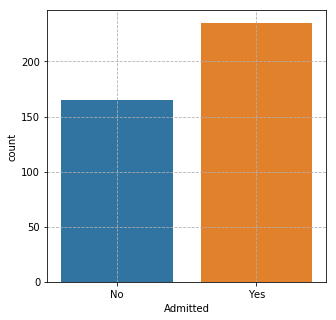

In [8]:
# count plot for sutudents admission into a university
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax = sns.countplot(data['Admitted'])
ax.set_xticklabels(['No', 'Yes'])
ax.grid(True, ls='--')

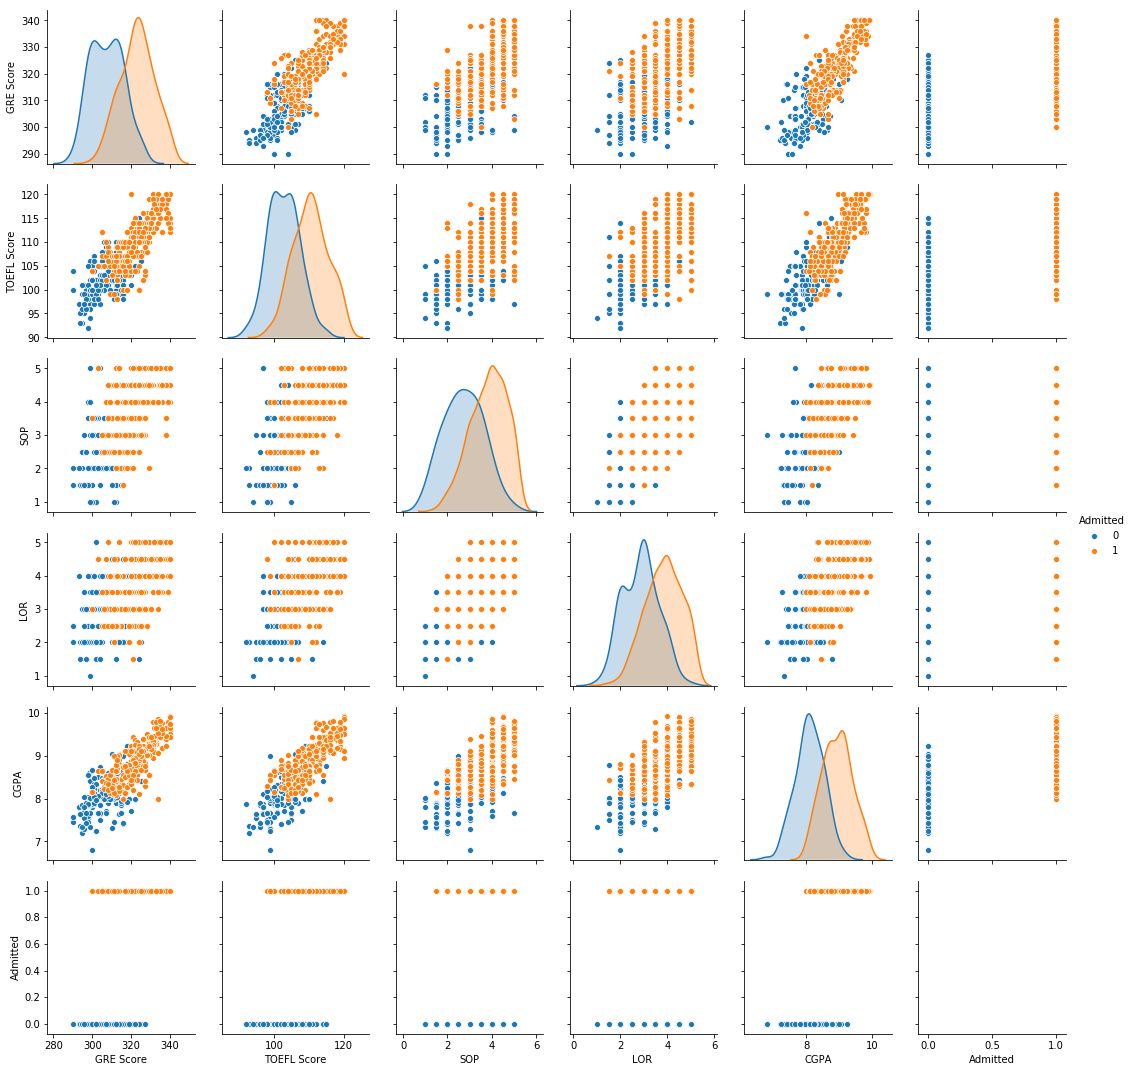

In [9]:
# Will the higher GRE score, TOEFL score, CGPA, Statement of Purpose (SOP) and Letter of Recommendation (LOR) strenth 
# improve chance of admission? 
cols = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Admitted']

sns.pairplot(data[cols], hue= 'Admitted')

In [10]:
# lets check the facts
# students who admitted has higher average GRE Score, TOEFL score, CGPA, 'SOP' and 'LOR' values than who not.
data.groupby(['Admitted'])['GRE Score', 'TOEFL Score', 'CGPA', 'SOP', 'LOR '].mean()

,GRE Score,TOEFL Score,CGPA,SOP,LOR
Admitted,,,,,
0,307.696970,102.890909,8.113758,2.748485,2.881818
1,323.204255,110.582979,8.939574,3.857447,3.853191


In [11]:
# Will the research experience helpful in getting admission? 
data.groupby(['Admitted'])['Research'].mean()

Admitted
0    0.248485
1    0.757447
Name: Research, dtype: float64

In [12]:
# Set input features
X = data.drop(['Admitted'], axis=1)
# Set output class
y = data['Admitted']

In [13]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit to data, then transform it.
X_transformed = scaler.fit_transform(X)

In [14]:
# Split data into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, stratify=y, random_state=42)

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)

X_train Shape :  (320, 7)
X_test Shape  :  (80, 7)


In [15]:
# Logistic Regression classifier
clf = LogisticRegression(random_state=0)

# Fit the model according to the given training data.
clf.fit(X_train, y_train)

# Predict class labels on testing data
y_pred = clf.predict(X_test)

# accuracy score
print("Accuracy Score : {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))

Accuracy Score : 78.75 %


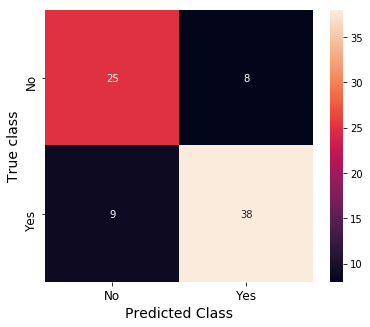

In [16]:
# confusion_matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1, 1, figsize=(6,5))

ax = sns.heatmap(cm, annot=True)
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_ylabel("True class", fontsize=14)
ax.set_xticklabels(['No', 'Yes'], fontsize=12)
ax.set_yticklabels(['No', 'Yes'], fontsize=12)
plt.show()

In [17]:
# Classification Report
target_names = ['No', 'Yes']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.74      0.76      0.75        33
         Yes       0.83      0.81      0.82        47

   micro avg       0.79      0.79      0.79        80
   macro avg       0.78      0.78      0.78        80
weighted avg       0.79      0.79      0.79        80

